In [1]:
import os
import sys
sys.path.append('..')
from src import RASPRoutines

RASP = RASPRoutines.RASP_Routines()
import pandas as pd
from src import AnalysisFunctions

A_F = AnalysisFunctions.Analysis_Functions()
from src import IOFunctions

from src import Image_Analysis_Functions

IA_F = Image_Analysis_Functions.ImageAnalysis_Functions()

from src import CoincidenceFunctions

C_F = CoincidenceFunctions.Coincidence_Functions()

from src import HelperFunctions
H_F = HelperFunctions.Helper_Functions()

IO = IOFunctions.IO_Functions()
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

from src import PlottingFunctions

plotter = PlottingFunctions.Plotter()

import polars as pl
from scipy.signal import fftconvolve, convolve
from scipy.ndimage import binary_opening, binary_closing, binary_fill_holes
import skimage as ski

from scipy import stats

from scipy import ndimage as ndi
from skimage import (exposure, feature, filters, io, measure,
                      morphology, restoration, segmentation, transform,
                      util)
from skimage.measure import label, regionprops_table, centroid

In [2]:
test_image = np.zeros([30, 30]) + 15.
test_image[2:6, 7:11] += 100

test_image[12:16, 14:18] += 100

image_size = (30,30)

In [3]:
centroid = np.array([[4, 9], [14, 16]])

In [4]:
x_in, y_in, x_out, y_out = IA_F.intensity_pixel_indices(centroid, image_size)

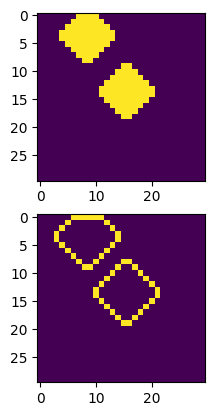

In [5]:
exemplar = np.zeros_like(test_image)
exemplar[x_in, y_in] = 1
exemplar_bg = np.zeros_like(test_image)
exemplar_bg[x_out, y_out] = 1

fig, ax = plt.subplots(2)
#ax[0].imshow(test_image)
ax[0].imshow(exemplar)
ax[1].imshow(exemplar_bg)

In [14]:
IA_F.estimate_intensity(image=test_image, centroids=centroid)

(array([1600., 1600.]), array([900., 900.]), array([15., 15.]))

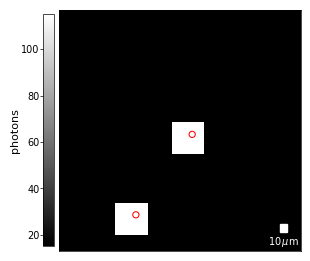

In [15]:
fig, axs = plotter.one_column_plot()

axs = plotter.image_scatter_plot(
        axs[0],
        test_image,
        np.array([4, 14]),
        np.array([9, 16]),
        vmin=None,
        vmax=None,
        cmap="gist_gray",
        cbar="on",
        cbarlabel="photons",
        label="",
        labelcolor="white",
        pixelsize=110,
        scalebarsize=100,
        scalebarlabel=r"10$\,\mu$m",
        alpha=1,
        scattercolor="red",
        facecolor="None",
        s=20,
        lws=0.75,
        plotmask=False,
        mask=None,
        maskcolor="white",
        masklinewidth=0.75,
        alpha_scatter=1,
    )